##Phase 2

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 4s 0us/step


##Reshaping:

following cells include stages of reshapeing , we can also do this by flattening input at sequential network, I prefered second method

In [3]:
#x_train.reshape(50000,-1)



In [4]:
#x_test.reshape(10000,-1)

##Normalizing

we can use normalize function of sklearn library or we can do it by calculating the formula of normalizzation. I prefered the secend way.

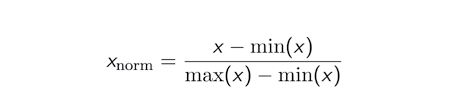

In [5]:
#from sklearn.preprocessing import normalize

#one_d_x_train=x_train.reshape(-1)
#one_d_x_train

In [6]:
#norm_x_train=normalize([one_d_x_train])
#norm_x_train

In [7]:
#norm_x_train.reshape(50000,-1)

#norm_x_train

In [8]:
#norm = np.linalg.norm(x_train)
#normalized_x_train = x_train/norm  

#normalized_x_train

In [9]:
#norm2 = np.linalg.norm(x_test)
#normalized_x_test = x_test/norm2 

#normalized_x_test

In [10]:
np.max(x_train)

255

min =0
max =255
So , according to formula:

In [11]:
x_train=x_train/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [12]:
x_test=x_test/255

In [13]:
y_train[15]

array([9], dtype=uint8)

##One-hot encoding

In [14]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)

y_train_cat[15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
y_test_cat = to_categorical(y_test)

##Part 2

In [16]:
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
)

We create the neural network :

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                6

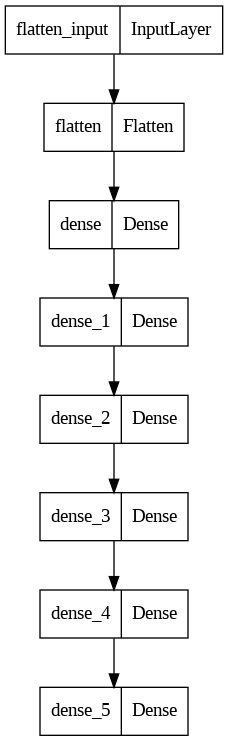

In [19]:
tf.keras.utils.plot_model(model)

In [20]:
from tensorflow import keras
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

we fit the model with parameters told in description:

In [22]:
log=model.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6393 - accuracy: 0.4176 - val_loss: 1.6787 - val_accuracy: 0.4015
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5555 - accuracy: 0.4434 - val_loss: 1.6117 - val_accuracy: 0.4139
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4980 - accuracy: 0.4658 - val_loss: 1.5753 - val_accuracy: 0.4196
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4527 - accuracy: 0.4825 - val_loss: 1.5304 - val_accuracy: 0.4489
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4106 - accuracy: 0.4983 - val_loss: 1.5152 - val_accuracy: 0.4567
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.3755 - accuracy: 0.5088 - val_loss: 1.4460 - val_accuracy: 0.4850
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.3355 - accuracy: 0.5220 - val_loss: 1.4089 -

We use bulit-in classification_report for getting the dtails of our training 

In [23]:
from sklearn.metrics import classification_report

y_train_pred=model.predict(x_train)

y_train_pred


1563/1563 [==============================] - 14s 9ms/step


array([[4.4568490e-02, 2.1633795e-03, 3.8650617e-02, ..., 5.8947027e-02,
        1.1746038e-03, 7.2103849e-04],
       [2.0014327e-02, 3.2848656e-01, 1.0202352e-03, ..., 1.4204381e-03,
        3.2509178e-01, 3.1942341e-01],
       [1.4727553e-02, 9.1239577e-03, 1.0426984e-03, ..., 3.6224596e-02,
        2.1123486e-02, 9.0643883e-01],
       ...,
       [1.6723759e-02, 1.3454178e-02, 7.9369399e-04, ..., 3.7453678e-03,
        2.7899714e-02, 9.3282050e-01],
       [4.1281234e-02, 3.1708720e-01, 1.3856021e-04, ..., 3.9106846e-04,
        5.3661752e-01, 1.0369504e-01],
       [5.2646118e-01, 4.4433530e-02, 1.3827098e-02, ..., 2.5764292e-01,
        5.3291362e-02, 4.2763487e-02]], dtype=float32)

In [24]:
y_train_pred=np.argmax(y_train_pred,axis=1)
y_train_pred

array([6, 1, 9, ..., 9, 8, 0])

In [25]:
train_report=classification_report(y_train, y_train_pred)
print(train_report)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57      5000
           1       0.74      0.68      0.71      5000
           2       0.54      0.28      0.37      5000
           3       0.47      0.38      0.42      5000
           4       0.51      0.51      0.51      5000
           5       0.61      0.31      0.41      5000
           6       0.48      0.76      0.59      5000
           7       0.71      0.63      0.67      5000
           8       0.52      0.80      0.63      5000
           9       0.68      0.62      0.65      5000

    accuracy                           0.56     50000
   macro avg       0.58      0.56      0.55     50000
weighted avg       0.58      0.56      0.55     50000



In [26]:
y_test_pred=model.predict(x_test)

y_test_pred

313/313 [==============================] - 3s 9ms/step


array([[1.7633733e-01, 1.4657721e-01, 9.3479410e-02, ..., 3.8588133e-03,
        1.7001846e-01, 1.2653032e-02],
       [1.6380340e-02, 3.7244540e-02, 2.2245709e-04, ..., 4.2474500e-04,
        8.7689763e-01, 6.6797398e-02],
       [2.9784897e-01, 3.5209607e-02, 1.4891708e-03, ..., 1.9460068e-03,
        6.3762432e-01, 2.1664014e-02],
       ...,
       [1.3277239e-02, 9.3367795e-04, 1.6510518e-01, ..., 3.5031673e-02,
        1.3203335e-02, 7.0504313e-03],
       [1.0803318e-01, 7.3818243e-03, 6.3292354e-02, ..., 3.5044454e-02,
        4.0477473e-02, 1.5932171e-02],
       [3.2919206e-02, 3.5529472e-03, 4.5120340e-02, ..., 7.1927053e-01,
        6.1638569e-03, 1.3081818e-02]], dtype=float32)

In [27]:
y_test_pred=np.argmax(y_test_pred,axis=1)
y_test_pred

array([0, 8, 8, ..., 3, 6, 7])

In [28]:
test_report=classification_report(y_test, y_test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.47      0.64      0.54      1000
           1       0.68      0.58      0.63      1000
           2       0.48      0.24      0.32      1000
           3       0.40      0.31      0.35      1000
           4       0.46      0.45      0.46      1000
           5       0.54      0.28      0.36      1000
           6       0.45      0.73      0.56      1000
           7       0.64      0.54      0.58      1000
           8       0.46      0.76      0.57      1000
           9       0.59      0.53      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.49     10000
weighted avg       0.52      0.51      0.49     10000



##plots

In [29]:
import matplotlib.pyplot as plt


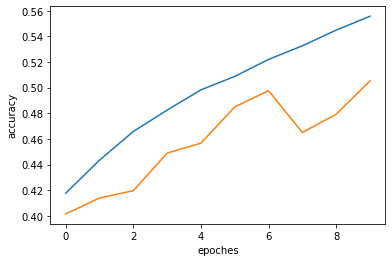

In [30]:
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

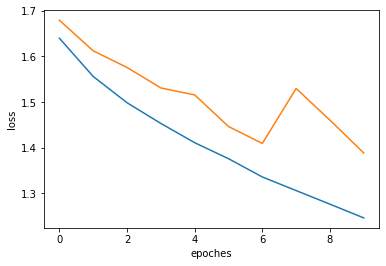

In [31]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

##Part 2


##Optimizer

Momentum is a technique to prevent sensitive movement. When the gradient gets computed every iteration, it can have totally different direction and the steps make a zigzag path, which makes training very slow.

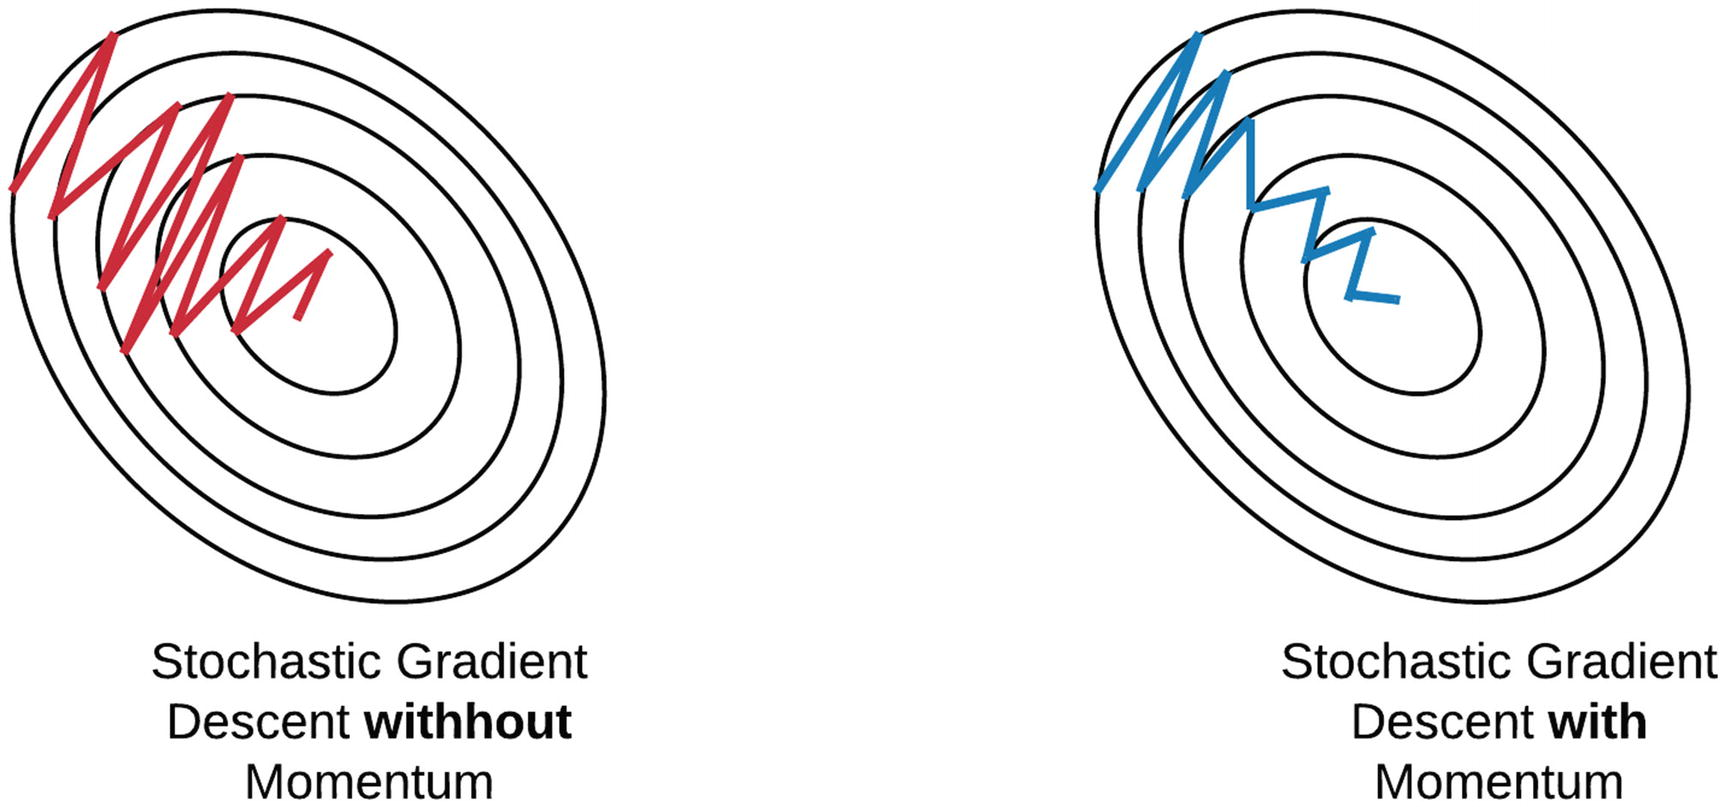

BackPropagation updating changes when in this way , when using a momentum :

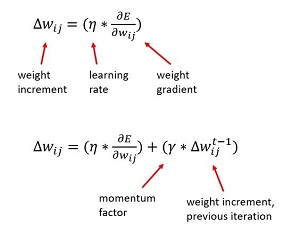

In fact in implementing momentum ,We add an additional hyperparameter that controls the amount of history (momentum) to include in the update equation.
Using momentum help the model with speeding up learning process and skipping local minnums.

momentum =0.5:

In [32]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])




In [33]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.5), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [34]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8390 - accuracy: 0.3316 - val_loss: 1.6958 - val_accuracy: 0.3962
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6404 - accuracy: 0.4116 - val_loss: 1.5850 - val_accuracy: 0.4332
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5509 - accuracy: 0.4449 - val_loss: 1.5470 - val_accuracy: 0.4450
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4866 - accuracy: 0.4702 - val_loss: 1.4603 - val_accuracy: 0.4864
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4379 - accuracy: 0.4868 - val_loss: 1.4678 - val_accuracy: 0.4722
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3943 - accuracy: 0.5018 - val_loss: 1.4168 - val_accuracy: 0.4947
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3536 - accuracy: 0.5142 - val_loss: 1.4760 -

In [35]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)


1563/1563 [==============================] - 14s 9ms/step
              precision    recall  f1-score   support

           0       0.61      0.58      0.60      5000
           1       0.60      0.81      0.69      5000
           2       0.55      0.26      0.35      5000
           3       0.59      0.16      0.25      5000
           4       0.41      0.62      0.49      5000
           5       0.50      0.47      0.49      5000
           6       0.51      0.71      0.59      5000
           7       0.57      0.70      0.63      5000
           8       0.58      0.80      0.68      5000
           9       0.81      0.42      0.55      5000

    accuracy                           0.55     50000
   macro avg       0.57      0.55      0.53     50000
weighted avg       0.57      0.55      0.53     50000



In [36]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1000
           1       0.55      0.72      0.62      1000
           2       0.46      0.23      0.30      1000
           3       0.46      0.12      0.19      1000
           4       0.38      0.56      0.45      1000
           5       0.45      0.42      0.43      1000
           6       0.47      0.67      0.56      1000
           7       0.53      0.65      0.58      1000
           8       0.53      0.74      0.62      1000
           9       0.69      0.34      0.45      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.48     10000
weighted avg       0.51      0.50      0.48     10000



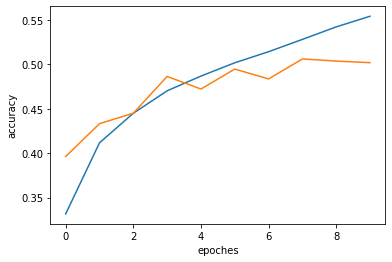

In [37]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

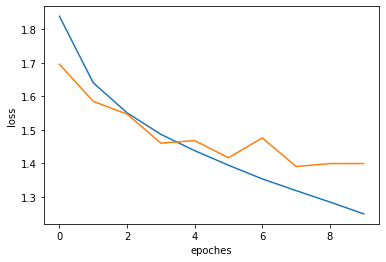

In [38]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

We see that it results a bit better than training without momentum

momentum =0.9

In [39]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [40]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [41]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.9024 - accuracy: 0.3006 - val_loss: 1.7756 - val_accuracy: 0.3631
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.7250 - accuracy: 0.3749 - val_loss: 1.6897 - val_accuracy: 0.3888
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.6399 - accuracy: 0.4100 - val_loss: 1.6178 - val_accuracy: 0.4172
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5778 - accuracy: 0.4305 - val_loss: 1.5265 - val_accuracy: 0.4465
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5267 - accuracy: 0.4514 - val_loss: 1.5847 - val_accuracy: 0.4304
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4897 - accuracy: 0.4653 - val_loss: 1.5211 - val_accuracy: 0.4586
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4473 - accuracy: 0.4814 - val_loss: 1.4826 -

In [42]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)


1563/1563 [==============================] - 15s 9ms/step
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      5000
           1       0.65      0.69      0.67      5000
           2       0.41      0.46      0.43      5000
           3       0.36      0.22      0.27      5000
           4       0.54      0.37      0.44      5000
           5       0.35      0.66      0.46      5000
           6       0.61      0.52      0.56      5000
           7       0.72      0.56      0.63      5000
           8       0.65      0.69      0.67      5000
           9       0.64      0.58      0.61      5000

    accuracy                           0.53     50000
   macro avg       0.55      0.53      0.53     50000
weighted avg       0.55      0.53      0.53     50000



In [43]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.61      0.63      0.62      1000
           2       0.37      0.43      0.40      1000
           3       0.33      0.21      0.26      1000
           4       0.51      0.31      0.39      1000
           5       0.33      0.62      0.43      1000
           6       0.56      0.51      0.54      1000
           7       0.65      0.50      0.57      1000
           8       0.61      0.66      0.64      1000
           9       0.58      0.51      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



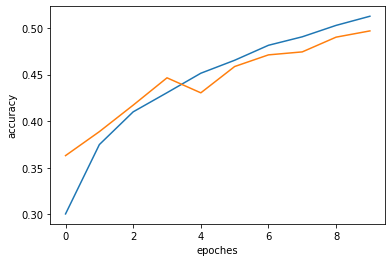

In [44]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

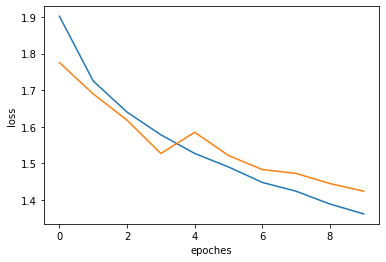

In [45]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

We can see that we had better results with momentum=0.5 , but this value also has a good impact, too.

momentum=0.98

In [153]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [154]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.98), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [156]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 2.0772 - accuracy: 0.2020 - val_loss: 2.0073 - val_accuracy: 0.1956
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 2.0068 - accuracy: 0.2292 - val_loss: 1.9943 - val_accuracy: 0.2214
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 2.0277 - accuracy: 0.2269 - val_loss: 2.0182 - val_accuracy: 0.2070
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 2.0593 - accuracy: 0.2138 - val_loss: 2.0490 - val_accuracy: 0.2078
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 2.1654 - accuracy: 0.1653 - val_loss: 2.2319 - val_accuracy: 0.1287
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 2.3139 - accuracy: 0.1024 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3065 - accuracy: 0.1010 - val_loss: 2.3070 -

In [157]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)

1563/1563 [==============================] - 13s 8ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      5000
           1       0.00      0.00      0.00      5000
           2       0.00      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.67      0.00      0.00      5000
           5       0.00      0.00      0.00      5000
           6       0.00      0.00      0.00      5000
           7       0.00      0.00      0.00      5000
           8       0.00      0.00      0.00      5000
           9       0.00      0.00      0.00      5000

    accuracy                           0.10     50000
   macro avg       0.08      0.10      0.02     50000
weighted avg       0.08      0.10      0.02     50000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      1.00      0.18      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


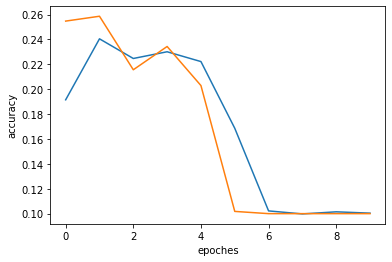

In [51]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

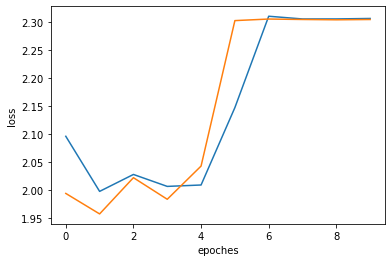

In [52]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

We can see that it didin't do well with this value.

when we have bigger momentum , we are taking bigger steps at reach run therefor sometimes greater values of momentum cause weaker results. 

Infact momentum is a term which can help us get out of local mins but using big momentum becuase of the explained reasons may cause bad effects.

Adam optimizer:

In [65]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [67]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])


In [68]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.9214 - accuracy: 0.2914 - val_loss: 1.7986 - val_accuracy: 0.3573
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.7285 - accuracy: 0.3775 - val_loss: 1.6813 - val_accuracy: 0.3898
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6348 - accuracy: 0.4118 - val_loss: 1.5932 - val_accuracy: 0.4281
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5732 - accuracy: 0.4357 - val_loss: 1.5531 - val_accuracy: 0.4407
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5274 - accuracy: 0.4523 - val_loss: 1.5223 - val_accuracy: 0.4651
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4916 - accuracy: 0.4636 - val_loss: 1.5468 - val_accuracy: 0.4447
Epoch 7/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4575 - accuracy: 0.4740 - val_loss: 1.4864 -

In [69]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)

1563/1563 [==============================] - 14s 9ms/step
              precision    recall  f1-score   support

           0       0.66      0.46      0.55      5000
           1       0.73      0.54      0.62      5000
           2       0.40      0.30      0.34      5000
           3       0.38      0.27      0.32      5000
           4       0.40      0.47      0.43      5000
           5       0.48      0.36      0.41      5000
           6       0.40      0.75      0.52      5000
           7       0.64      0.56      0.59      5000
           8       0.55      0.76      0.64      5000
           9       0.60      0.60      0.60      5000

    accuracy                           0.51     50000
   macro avg       0.52      0.51      0.50     50000
weighted avg       0.52      0.51      0.50     50000



In [70]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.62      0.43      0.51      1000
           1       0.68      0.48      0.56      1000
           2       0.36      0.29      0.32      1000
           3       0.32      0.22      0.26      1000
           4       0.40      0.45      0.42      1000
           5       0.44      0.32      0.37      1000
           6       0.38      0.74      0.50      1000
           7       0.57      0.48      0.52      1000
           8       0.50      0.72      0.59      1000
           9       0.56      0.55      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



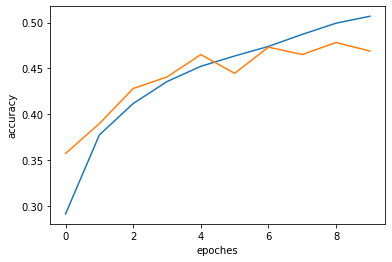

In [71]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

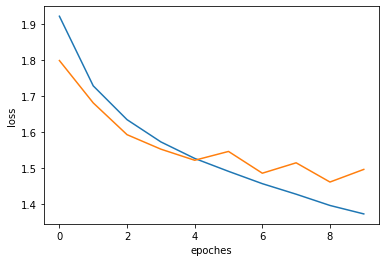

In [72]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

Adam did worse than SGD .But as we see it is performing better and better by each iteration.We hope it would result in better accuracies by tuning its hyperparameters.

##ephoch

 

*   In neural network weights are updated iteratively, as it is a gradient descent based algorithm. A single epoch in training is not enough and leads to underfitting.
Also the purpose of implementing neural network is to run on the non-training data , therefor we perfer to iterate more in order to make better judgment with respect to statistics.



*  Too many epochs can lead to overfitting of the training dataset,too.Early stopping can help us stop the training when the accuracy is acceptable on both training and test data.


In [74]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [75]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [76]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.9089 - accuracy: 0.2975 - val_loss: 1.7826 - val_accuracy: 0.3650
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.7353 - accuracy: 0.3741 - val_loss: 1.6819 - val_accuracy: 0.3978
Epoch 3/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6500 - accuracy: 0.4040 - val_loss: 1.6013 - val_accuracy: 0.4276
Epoch 4/20
1563/1563 [==============================] - 49s 32ms/step - loss: 1.5864 - accuracy: 0.4309 - val_loss: 1.5539 - val_accuracy: 0.4406
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5329 - accuracy: 0.4476 - val_loss: 1.5503 - val_accuracy: 0.4403
Epoch 6/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4962 - accuracy: 0.4618 - val_loss: 1.5026 - val_accuracy: 0.4640
Epoch 7/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4616 - accuracy: 0.4736 - val_loss: 1.4910 -

In [77]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)

1563/1563 [==============================] - 14s 9ms/step
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      5000
           1       0.71      0.73      0.72      5000
           2       0.58      0.34      0.43      5000
           3       0.44      0.52      0.48      5000
           4       0.51      0.57      0.54      5000
           5       0.63      0.35      0.45      5000
           6       0.64      0.64      0.64      5000
           7       0.62      0.72      0.67      5000
           8       0.64      0.79      0.70      5000
           9       0.65      0.68      0.67      5000

    accuracy                           0.60     50000
   macro avg       0.60      0.60      0.59     50000
weighted avg       0.60      0.60      0.59     50000



In [78]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.60      0.59      0.60      1000
           2       0.44      0.26      0.32      1000
           3       0.33      0.39      0.36      1000
           4       0.43      0.47      0.45      1000
           5       0.48      0.27      0.34      1000
           6       0.52      0.55      0.54      1000
           7       0.51      0.60      0.55      1000
           8       0.56      0.72      0.63      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



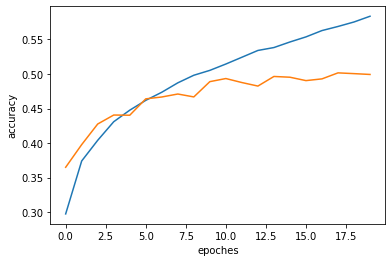

In [79]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

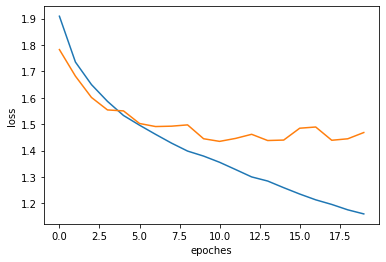

In [80]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

In [81]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [82]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [83]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=30,batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 49s 31ms/step - loss: 1.9332 - accuracy: 0.2889 - val_loss: 1.7874 - val_accuracy: 0.3614
Epoch 2/30
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7177 - accuracy: 0.3822 - val_loss: 1.6541 - val_accuracy: 0.4030
Epoch 3/30
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6357 - accuracy: 0.4126 - val_loss: 1.6007 - val_accuracy: 0.4230
Epoch 4/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5767 - accuracy: 0.4307 - val_loss: 1.5386 - val_accuracy: 0.4541
Epoch 5/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5317 - accuracy: 0.4489 - val_loss: 1.5546 - val_accuracy: 0.4480
Epoch 6/30
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4944 - accuracy: 0.4639 - val_loss: 1.4866 - val_accuracy: 0.4714
Epoch 7/30
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4597 - accuracy: 0.4754 - val_loss: 1.4728 -

In [84]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)

1563/1563 [==============================] - 14s 9ms/step
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      5000
           1       0.74      0.76      0.75      5000
           2       0.56      0.50      0.53      5000
           3       0.53      0.53      0.53      5000
           4       0.56      0.54      0.55      5000
           5       0.68      0.46      0.55      5000
           6       0.62      0.72      0.67      5000
           7       0.66      0.76      0.71      5000
           8       0.70      0.78      0.74      5000
           9       0.73      0.65      0.69      5000

    accuracy                           0.64     50000
   macro avg       0.64      0.64      0.64     50000
weighted avg       0.64      0.64      0.64     50000



In [85]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.53      0.58      0.56      1000
           1       0.59      0.61      0.60      1000
           2       0.40      0.36      0.38      1000
           3       0.32      0.34      0.33      1000
           4       0.42      0.40      0.41      1000
           5       0.42      0.28      0.34      1000
           6       0.48      0.57      0.52      1000
           7       0.53      0.61      0.57      1000
           8       0.59      0.66      0.62      1000
           9       0.57      0.48      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



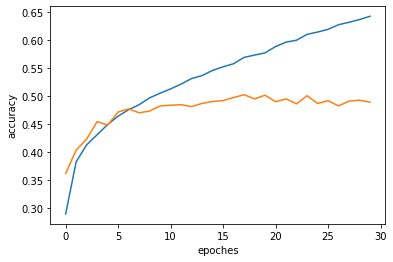

In [86]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

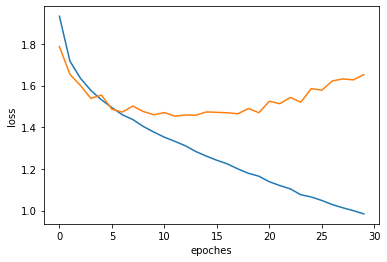

In [87]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

##Loss Function

In [158]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [159]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

In [160]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0821 - accuracy: 0.2780 - val_loss: 0.0771 - val_accuracy: 0.3534
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0763 - accuracy: 0.3593 - val_loss: 0.0745 - val_accuracy: 0.3774
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.0741 - accuracy: 0.3884 - val_loss: 0.0729 - val_accuracy: 0.4029
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0723 - accuracy: 0.4105 - val_loss: 0.0712 - val_accuracy: 0.4175
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0709 - accuracy: 0.4250 - val_loss: 0.0702 - val_accuracy: 0.4291
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0696 - accuracy: 0.4410 - val_loss: 0.0707 - val_accuracy: 0.4353
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0687 - accuracy: 0.4497 - val_loss: 0.0706 -

In [161]:
y_train_pred2=model2.predict(x_train)
y_train_pred2=np.argmax(y_train_pred2,axis=1)
train_report2=classification_report(y_train, y_train_pred2)
print(train_report2)

1563/1563 [==============================] - 13s 8ms/step
              precision    recall  f1-score   support

           0       0.46      0.63      0.53      5000
           1       0.56      0.64      0.60      5000
           2       0.41      0.24      0.31      5000
           3       0.35      0.38      0.37      5000
           4       0.48      0.33      0.39      5000
           5       0.52      0.26      0.34      5000
           6       0.42      0.67      0.52      5000
           7       0.51      0.61      0.55      5000
           8       0.70      0.52      0.60      5000
           9       0.53      0.60      0.56      5000

    accuracy                           0.49     50000
   macro avg       0.49      0.49      0.48     50000
weighted avg       0.49      0.49      0.48     50000



In [162]:
y_test_pred2=model2.predict(x_test)
y_test_pred2=np.argmax(y_test_pred2,axis=1)
test_report2=classification_report(y_test, y_test_pred2)
print(test_report2)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.46      0.64      0.53      1000
           1       0.53      0.60      0.57      1000
           2       0.39      0.22      0.28      1000
           3       0.33      0.34      0.33      1000
           4       0.44      0.30      0.36      1000
           5       0.47      0.24      0.32      1000
           6       0.42      0.67      0.52      1000
           7       0.47      0.57      0.52      1000
           8       0.64      0.51      0.57      1000
           9       0.50      0.53      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



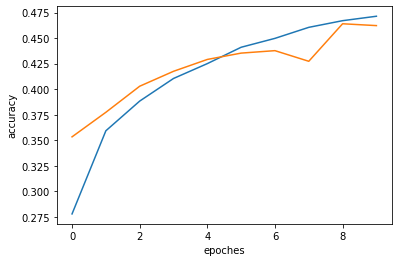

In [163]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

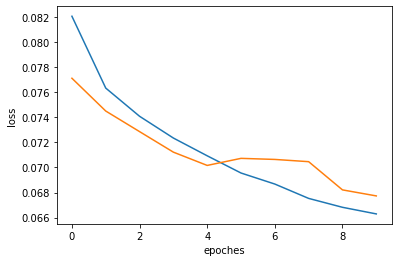

In [164]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

We can see that it did worse than categorical loss on model.

It has some reasons:

In fact MSE loss function calculates the distance between predicted value and correct value. In order to calculate this value it assign categories numrical values , bacause of that it calculate the distance between predicted class of 8 and true class of 10 more than the distance between predicted class of 3 and true class of 1 , which is not true.

Also In categorical data we don't have normal distribution , but MSE assume that our data has.


MSE is usually used as a loss function in regression problems.

##Regularization

We have three kinds of layer weights regulizers:



*   kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
*   bias_regularizer: Regularizer to apply a penalty on the layer's bias
*   activity_regularizer: Regularizer to apply a penalty on the layer's output






In [173]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [174]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [175]:
log2=model2.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9889 - accuracy: 0.2662 - val_loss: 1.8117 - val_accuracy: 0.3367
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7928 - accuracy: 0.3508 - val_loss: 1.6698 - val_accuracy: 0.3946
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.7097 - accuracy: 0.3860 - val_loss: 1.6005 - val_accuracy: 0.4259
Epoch 4/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.6530 - accuracy: 0.4069 - val_loss: 1.5400 - val_accuracy: 0.4567
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6074 - accuracy: 0.4244 - val_loss: 1.5352 - val_accuracy: 0.4485
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5706 - accuracy: 0.4398 - val_loss: 1.5574 - val_accuracy: 0.4389
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5328 - accuracy: 0.4526 - val_loss: 1.4951 -

In [176]:
y_train_pred=model2.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model2.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 13s 8ms/step
              precision    recall  f1-score   support

           0       0.60      0.53      0.56      5000
           1       0.60      0.72      0.65      5000
           2       0.40      0.32      0.35      5000
           3       0.33      0.45      0.38      5000
           4       0.58      0.28      0.38      5000
           5       0.41      0.40      0.41      5000
           6       0.48      0.64      0.55      5000
           7       0.63      0.58      0.60      5000
           8       0.72      0.58      0.64      5000
           9       0.53      0.65      0.58      5000

    accuracy                           0.51     50000
   macro avg       0.53      0.51      0.51     50000
weighted avg       0.53      0.51      0.51     50000

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1000
           1       

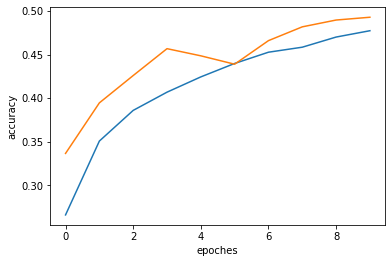

In [179]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

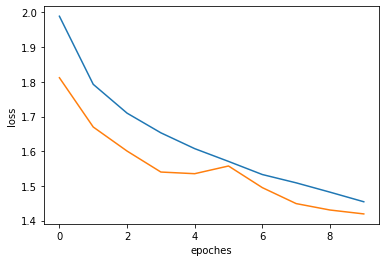

In [180]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

When we use dropout regularization , we see although it doesn't make tremendous change on accuaracy of train data but it results better on test data.

In fact with using dropout method , we can avoid overfitting and high variance .

##Another model :
We train another model in order to see the impacts of all changes we made better:

In [181]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [182]:
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log2=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8768 - accuracy: 0.3260 - val_loss: 1.7578 - val_accuracy: 0.3579
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6796 - accuracy: 0.4011 - val_loss: 1.6502 - val_accuracy: 0.4045
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5918 - accuracy: 0.4335 - val_loss: 1.5847 - val_accuracy: 0.4286
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5326 - accuracy: 0.4566 - val_loss: 1.6049 - val_accuracy: 0.4323
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4837 - accuracy: 0.4753 - val_loss: 1.5245 - val_accuracy: 0.4569
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4426 - accuracy: 0.4864 - val_loss: 1.6398 - val_accuracy: 0.4071
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4076 - accuracy: 0.5031 - val_loss: 1.5294 -

In [183]:
y_train_pred=model3.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model3.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.64      0.41      0.50      5000
           1       0.41      0.87      0.55      5000
           2       0.41      0.45      0.43      5000
           3       0.41      0.40      0.41      5000
           4       0.59      0.29      0.39      5000
           5       0.56      0.26      0.35      5000
           6       0.63      0.51      0.56      5000
           7       0.69      0.53      0.60      5000
           8       0.54      0.72      0.62      5000
           9       0.49      0.61      0.54      5000

    accuracy                           0.51     50000
   macro avg       0.54      0.51      0.50     50000
weighted avg       0.54      0.51      0.50     50000

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.61      0.41      0.49      1000
           1       0

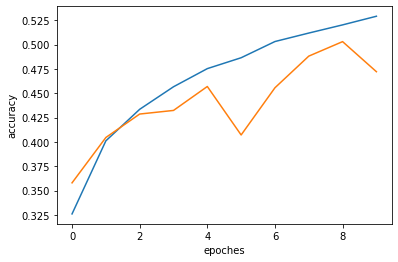

In [184]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

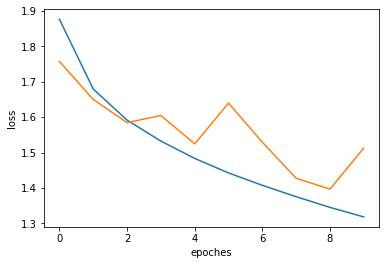

In [185]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

##momentum 

In [117]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [118]:
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.5), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log2=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8360 - accuracy: 0.3396 - val_loss: 1.7748 - val_accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6401 - accuracy: 0.4135 - val_loss: 1.6010 - val_accuracy: 0.4335
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5521 - accuracy: 0.4467 - val_loss: 1.5109 - val_accuracy: 0.4643
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4937 - accuracy: 0.4648 - val_loss: 1.4906 - val_accuracy: 0.4752
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4466 - accuracy: 0.4832 - val_loss: 1.4522 - val_accuracy: 0.4864
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4048 - accuracy: 0.4987 - val_loss: 1.4691 - val_accuracy: 0.4805
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3667 - accuracy: 0.5136 - val_loss: 1.3758 -

In [119]:
y_train_pred=model3.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model3.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      5000
           1       0.60      0.77      0.67      5000
           2       0.43      0.47      0.45      5000
           3       0.49      0.30      0.37      5000
           4       0.55      0.40      0.46      5000
           5       0.67      0.22      0.34      5000
           6       0.54      0.66      0.59      5000
           7       0.53      0.69      0.60      5000
           8       0.67      0.68      0.68      5000
           9       0.49      0.73      0.59      5000

    accuracy                           0.55     50000
   macro avg       0.56      0.55      0.53     50000
weighted avg       0.56      0.55      0.53     50000

313/313 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1000
           1       0

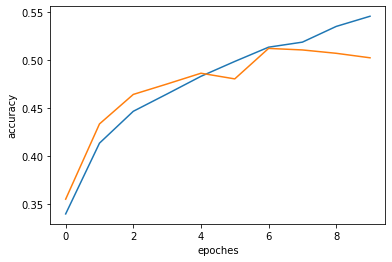

In [120]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

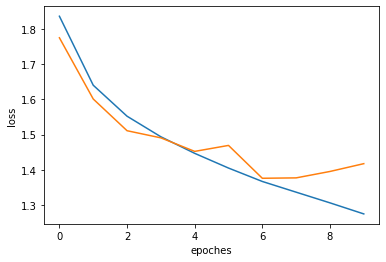

In [121]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

momentum=0.9:

In [122]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [123]:
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log2=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8675 - accuracy: 0.3181 - val_loss: 1.7725 - val_accuracy: 0.3597
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6935 - accuracy: 0.3907 - val_loss: 1.6517 - val_accuracy: 0.4028
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6115 - accuracy: 0.4229 - val_loss: 1.5517 - val_accuracy: 0.4472
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5536 - accuracy: 0.4410 - val_loss: 1.5404 - val_accuracy: 0.4526
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5157 - accuracy: 0.4538 - val_loss: 1.5534 - val_accuracy: 0.4339
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4795 - accuracy: 0.4678 - val_loss: 1.4877 - val_accuracy: 0.4638
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4474 - accuracy: 0.4809 - val_loss: 1.4864 -

In [124]:
y_train_pred=model3.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model3.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 7s 5ms/step
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      5000
           1       0.75      0.58      0.65      5000
           2       0.38      0.46      0.42      5000
           3       0.35      0.43      0.38      5000
           4       0.51      0.26      0.35      5000
           5       0.43      0.39      0.41      5000
           6       0.50      0.62      0.55      5000
           7       0.59      0.62      0.60      5000
           8       0.63      0.67      0.65      5000
           9       0.63      0.59      0.61      5000

    accuracy                           0.52     50000
   macro avg       0.53      0.52      0.52     50000
weighted avg       0.53      0.52      0.52     50000

313/313 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0

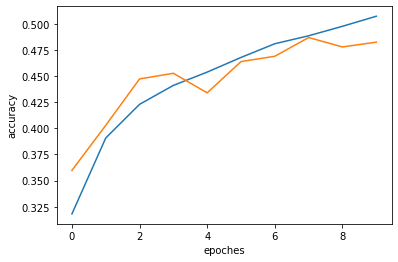

In [125]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

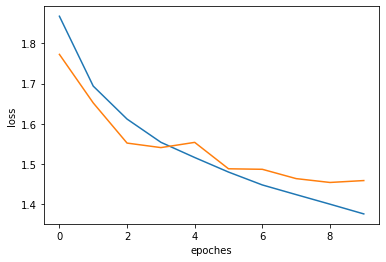

In [126]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

momentum=0.98

In [127]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [128]:
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log2=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8704 - accuracy: 0.3193 - val_loss: 1.7124 - val_accuracy: 0.3722
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6960 - accuracy: 0.3880 - val_loss: 1.6266 - val_accuracy: 0.4135
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6140 - accuracy: 0.4201 - val_loss: 1.5449 - val_accuracy: 0.4409
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5572 - accuracy: 0.4393 - val_loss: 1.5511 - val_accuracy: 0.4416
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5137 - accuracy: 0.4561 - val_loss: 1.5128 - val_accuracy: 0.4588
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4828 - accuracy: 0.4673 - val_loss: 1.4777 - val_accuracy: 0.4811
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4490 - accuracy: 0.4785 - val_loss: 1.4627 -

In [129]:
y_train_pred=model3.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model3.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 7s 5ms/step
              precision    recall  f1-score   support

           0       0.58      0.53      0.56      5000
           1       0.58      0.72      0.65      5000
           2       0.54      0.20      0.29      5000
           3       0.45      0.26      0.33      5000
           4       0.43      0.41      0.42      5000
           5       0.57      0.30      0.39      5000
           6       0.43      0.76      0.55      5000
           7       0.50      0.72      0.59      5000
           8       0.56      0.75      0.64      5000
           9       0.62      0.53      0.57      5000

    accuracy                           0.52     50000
   macro avg       0.53      0.52      0.50     50000
weighted avg       0.53      0.52      0.50     50000

313/313 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1000
           1       0

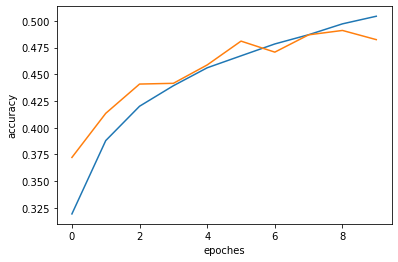

In [130]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

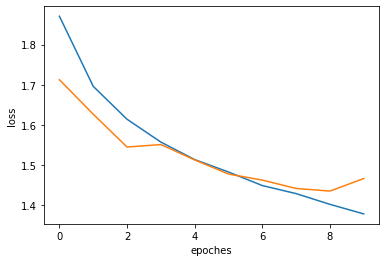

In [131]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

Adam optimizer:

In [132]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [133]:
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log2=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8599 - accuracy: 0.3239 - val_loss: 1.7723 - val_accuracy: 0.3671
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6698 - accuracy: 0.3992 - val_loss: 1.6139 - val_accuracy: 0.4172
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5882 - accuracy: 0.4295 - val_loss: 1.5474 - val_accuracy: 0.4438
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5404 - accuracy: 0.4469 - val_loss: 1.5765 - val_accuracy: 0.4336
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4972 - accuracy: 0.4644 - val_loss: 1.5268 - val_accuracy: 0.4590
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4630 - accuracy: 0.4741 - val_loss: 1.5081 - val_accuracy: 0.4676
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4344 - accuracy: 0.4881 - val_loss: 1.4747 -

In [134]:
y_train_pred=model3.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model3.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      5000
           1       0.61      0.71      0.65      5000
           2       0.41      0.38      0.40      5000
           3       0.39      0.37      0.38      5000
           4       0.49      0.40      0.44      5000
           5       0.46      0.38      0.41      5000
           6       0.44      0.70      0.54      5000
           7       0.65      0.55      0.59      5000
           8       0.62      0.70      0.66      5000
           9       0.62      0.53      0.57      5000

    accuracy                           0.53     50000
   macro avg       0.53      0.53      0.52     50000
weighted avg       0.53      0.53      0.52     50000

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.58      0.50      0.54      1000
           1       0

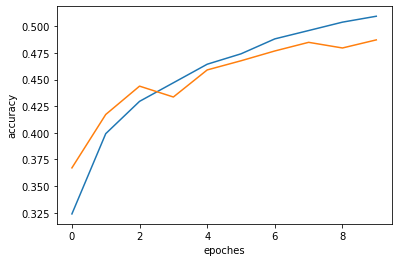

In [135]:
plt.plot(log2.history['accuracy'])
plt.plot(log2.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

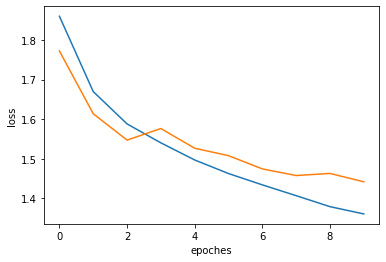

In [136]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

##epochs

In [137]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [138]:
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log3=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.8635 - accuracy: 0.3205 - val_loss: 1.7137 - val_accuracy: 0.3886
Epoch 2/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6806 - accuracy: 0.3942 - val_loss: 1.6155 - val_accuracy: 0.4176
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6005 - accuracy: 0.4257 - val_loss: 1.5922 - val_accuracy: 0.4294
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5438 - accuracy: 0.4484 - val_loss: 1.5319 - val_accuracy: 0.4454
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5066 - accuracy: 0.4601 - val_loss: 1.5322 - val_accuracy: 0.4499
Epoch 6/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4751 - accuracy: 0.4745 - val_loss: 1.5322 - val_accuracy: 0.4552
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4430 - accuracy: 0.4831 - val_loss: 1.4900 -

In [139]:
y_train_pred3=model3.predict(x_train)
y_train_pred3=np.argmax(y_train_pred3,axis=1)
train_report3=classification_report(y_train, y_train_pred3)
print(train_report3)

1563/1563 [==============================] - 7s 5ms/step
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      5000
           1       0.69      0.69      0.69      5000
           2       0.45      0.50      0.47      5000
           3       0.44      0.50      0.47      5000
           4       0.51      0.49      0.50      5000
           5       0.59      0.38      0.46      5000
           6       0.56      0.67      0.61      5000
           7       0.73      0.61      0.66      5000
           8       0.65      0.76      0.70      5000
           9       0.63      0.66      0.65      5000

    accuracy                           0.59     50000
   macro avg       0.59      0.59      0.58     50000
weighted avg       0.59      0.59      0.58     50000



In [140]:
y_test_pred3=model3.predict(x_test)
y_test_pred3=np.argmax(y_test_pred3,axis=1)
test_report3=classification_report(y_test, y_test_pred3)
print(test_report3)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1000
           1       0.62      0.59      0.61      1000
           2       0.37      0.42      0.40      1000
           3       0.33      0.39      0.36      1000
           4       0.44      0.42      0.43      1000
           5       0.45      0.27      0.34      1000
           6       0.46      0.57      0.51      1000
           7       0.62      0.49      0.55      1000
           8       0.57      0.68      0.62      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



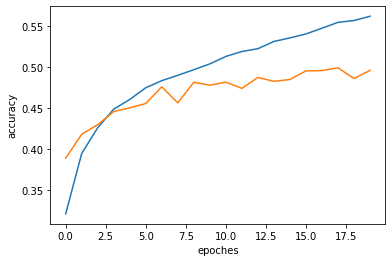

In [141]:
plt.plot(log3.history['accuracy'])
plt.plot(log3.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

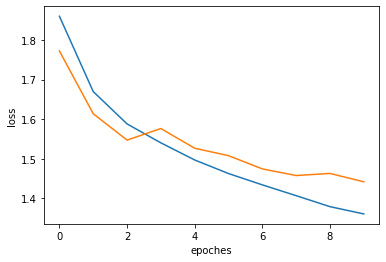

In [142]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

In [144]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [145]:
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
log3=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=30,batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8673 - accuracy: 0.3212 - val_loss: 1.6924 - val_accuracy: 0.3855
Epoch 2/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6821 - accuracy: 0.3962 - val_loss: 1.6905 - val_accuracy: 0.3956
Epoch 3/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6009 - accuracy: 0.4262 - val_loss: 1.5612 - val_accuracy: 0.4433
Epoch 4/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5402 - accuracy: 0.4473 - val_loss: 1.5179 - val_accuracy: 0.4534
Epoch 5/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5013 - accuracy: 0.4615 - val_loss: 1.5045 - val_accuracy: 0.4593
Epoch 6/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4688 - accuracy: 0.4738 - val_loss: 1.4798 - val_accuracy: 0.4721
Epoch 7/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4388 - accuracy: 0.4835 - val_loss: 1.4695 -

In [146]:
y_train_pred3=model3.predict(x_train)
y_train_pred3=np.argmax(y_train_pred3,axis=1)
train_report3=classification_report(y_train, y_train_pred3)
print(train_report3)

1563/1563 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      5000
           1       0.73      0.75      0.74      5000
           2       0.50      0.53      0.52      5000
           3       0.52      0.42      0.47      5000
           4       0.57      0.47      0.52      5000
           5       0.53      0.51      0.52      5000
           6       0.62      0.66      0.64      5000
           7       0.67      0.71      0.69      5000
           8       0.64      0.79      0.70      5000
           9       0.73      0.62      0.67      5000

    accuracy                           0.61     50000
   macro avg       0.61      0.61      0.61     50000
weighted avg       0.61      0.61      0.61     50000



In [147]:
y_test_pred3=model3.predict(x_test)
y_test_pred3=np.argmax(y_test_pred3,axis=1)
test_report3=classification_report(y_test, y_test_pred3)
print(test_report3)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.51      0.58      0.55      1000
           1       0.61      0.61      0.61      1000
           2       0.38      0.42      0.40      1000
           3       0.36      0.29      0.32      1000
           4       0.45      0.35      0.39      1000
           5       0.42      0.40      0.41      1000
           6       0.50      0.56      0.53      1000
           7       0.57      0.55      0.56      1000
           8       0.53      0.68      0.60      1000
           9       0.58      0.48      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



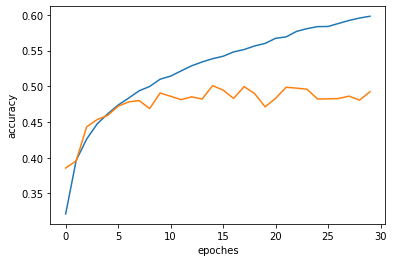

In [148]:
plt.plot(log3.history['accuracy'])
plt.plot(log3.history['val_accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.show()

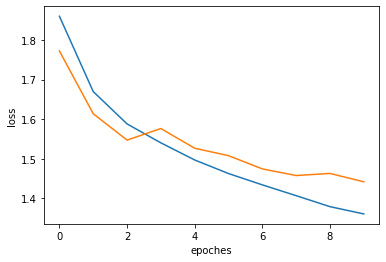

In [149]:
plt.plot(log2.history['loss'])
plt.plot(log2.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

##Loss Function

In [150]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [151]:
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])
log3=model3.fit(x_train,y_train_cat,validation_data=(x_test, y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.0802 - accuracy: 0.3128 - val_loss: 0.0781 - val_accuracy: 0.3417
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0749 - accuracy: 0.3787 - val_loss: 0.0736 - val_accuracy: 0.3974
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0724 - accuracy: 0.4100 - val_loss: 0.0718 - val_accuracy: 0.4178
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0705 - accuracy: 0.4292 - val_loss: 0.0728 - val_accuracy: 0.4089
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0688 - accuracy: 0.4488 - val_loss: 0.0700 - val_accuracy: 0.4368
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0677 - accuracy: 0.4591 - val_loss: 0.0688 - val_accuracy: 0.4473
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0667 - accuracy: 0.4701 - val_loss: 0.0666 -

In [152]:
y_train_pred=model3.predict(x_train)
y_train_pred=np.argmax(y_train_pred,axis=1)

train_report=classification_report(y_train, y_train_pred)
print(train_report)

y_test_pred=model3.predict(x_test)
y_test_pred=np.argmax(y_test_pred,axis=1)

test_report=classification_report(y_test, y_test_pred)
print(test_report)

1563/1563 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.52      0.57      0.55      5000
           1       0.68      0.58      0.63      5000
           2       0.40      0.39      0.39      5000
           3       0.39      0.35      0.37      5000
           4       0.40      0.52      0.45      5000
           5       0.45      0.37      0.41      5000
           6       0.61      0.46      0.52      5000
           7       0.51      0.60      0.55      5000
           8       0.61      0.64      0.63      5000
           9       0.55      0.60      0.58      5000

    accuracy                           0.51     50000
   macro avg       0.51      0.51      0.51     50000
weighted avg       0.51      0.51      0.51     50000

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0